# Question 6

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

#### Defining the required functions 

In [2]:
# Function for mean squared error estimation
def mean_squared_error1(y,y_pred):
# Takes input as two numpy arrays and returns the mean squared error

    error = np.sum((y-y_pred)**2)/len(y)
    return(error[0])

In [3]:
def linear_regression(X,y):
# Takes in a feature vector X and a target vector y and returns the linear regression parameter matrix

    X = np.matrix(X)
    y = np.matrix(y)
    # Let B be the matrix with parameters of regression ie B.X = y
    B = np.linalg.inv(X.T*X)*(X.T*y)
    return(B)

#### Creation of required dataset

In [4]:
# Creating x and y datasets
np.random.seed(10)
x = np.random.random_sample(100) # sampling 100 random numbers in (0,1)
y = np.exp(np.sin(2*np.pi*x)) + np.log(x) # Using the function assigned to group 7
noise = np.random.randn(100,1)*(0.2)**0.5 # Adding the gaussian noise with mean 0 and variance 0.2

In [5]:
# Verifying that mean of the noise is zero and variance is 0.2
print('Mean of noise = {}'.format(np.mean(noise)))
print('Variance of noise = {}'.format(np.var(noise)))

Mean of noise = 0.03237265326932114
Variance of noise = 0.19657633961155876


In [6]:
# Reshaping the shapes of x and y to the same form
y = y.reshape(100,1)
x = x.reshape(100,1)
y = y + noise
data = np.concatenate((x,y),axis=1)

In [7]:
# Performing train and test split in the ratio 80:20
np.random.seed(10)
N = x.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

x_train = x[order[:train_N],:]
y_train = y[order[:train_N]]

x_test = x[order[train_N:],:]
y_test = y[order[train_N:]]

# Converting the numpy arrays into data frames for easy manipulations
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

#### (a) Performing polynomial regression for n = 1,3,6,9 taking ten data points

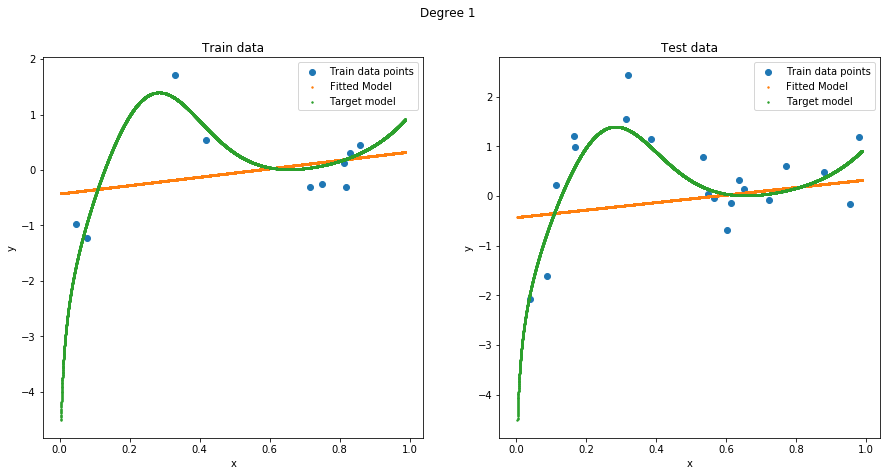

Coefficients for n = 1

        1       x^1
---------  --------
-0.425068  0.757785

The mean squared error for the test data is 1.1338688925379816


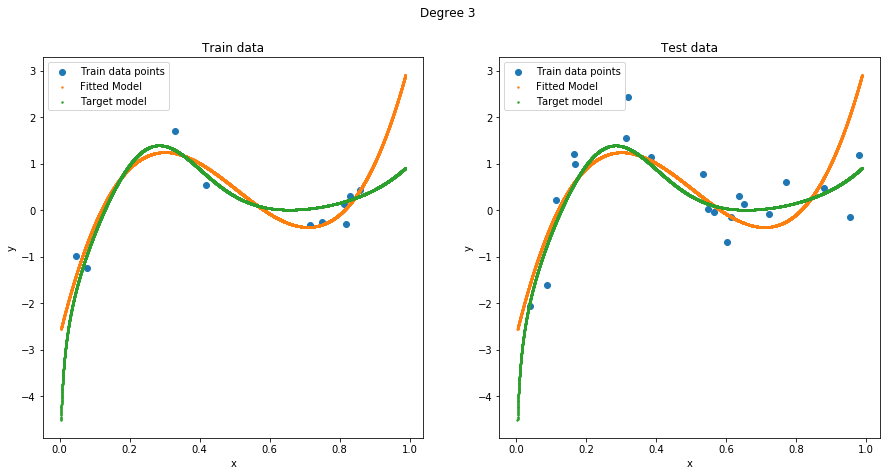

Coefficients for n = 3

       1     x^1       x^2      x^3
--------  ------  --------  -------
-2.66521  30.315  -71.7423  47.3525

The mean squared error for the test data is 0.6301241544359577


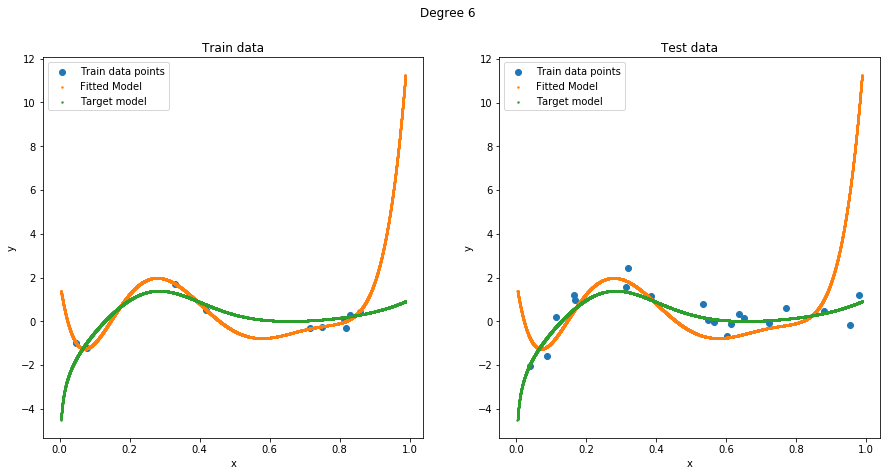

Coefficients for n = 6

    1       x^1      x^2       x^3      x^4       x^5      x^6
-----  --------  -------  --------  -------  --------  -------
1.777  -102.239  1118.89  -4504.34  8369.98  -7348.56  2478.39

The mean squared error for the test data is 5.968838306512525


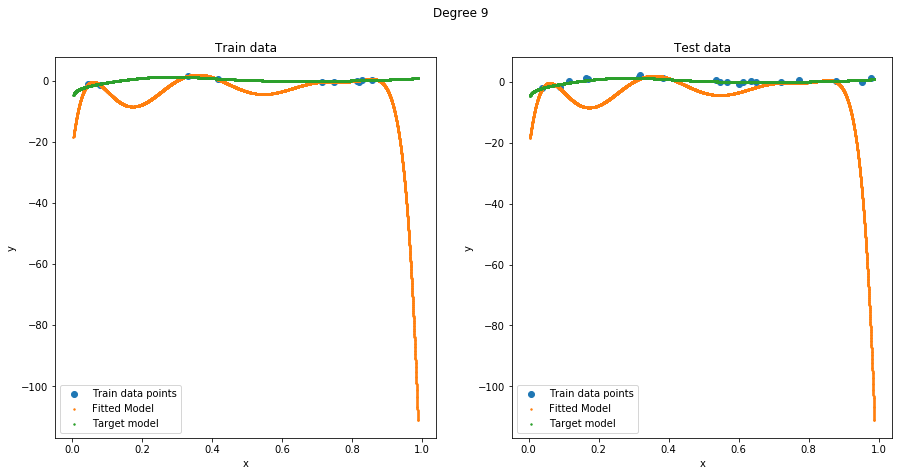

Coefficients for n = 9

       1     x^1       x^2    x^3      x^4     x^5     x^6      x^7     x^8      x^9
--------  ------  --------  -----  -------  ------  ------  -------  ------  -------
-21.7452  917.98  -13521.5  82938  -241867  312990  -17562  -409206  421092  -135917

The mean squared error for the test data is 467.19008972951406


In [8]:
for n in {1,3,6,9}:
    
    # Creating polynomial features from degree 1 to n, for example x, x^2, x^3,..x^n for the training set
    x1 = x_train[:10].copy()# Taking the first ten elements since we are supposed to take 10 elements for training
    for i in range(1,n+1):
        x1[str(i)] = x1[0]**i 
    x1[0]=1

    
    # Creating polynomial features from degree 1 to n, for example x, x^2, x^3,..x^n for the test set
    x1_test = x_test.copy()
    for i in range(1,n+1):
        x1_test[str(i)] = x1_test[0]**i
    x1_test[0] = 1
    
    # Creating data for plotting the created model
    x_plot = pd.DataFrame(np.linspace(min(x),max(x),10000))
    x_plot1 = x_plot.copy()
    for i in range(1,n+1):
        x_plot1[str(i)] = x_plot[0]**i
    x_plot1[0] = 1
    
    y1 = y_train[:10]  # Taking the first 10 elements of the target
    
    B = linear_regression(x1,y1) # Getting the linear regression parameters using the written function
    y1_pred = np.matrix(x1)*np.matrix(B) # Predicting target values using the fitted model
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Degree {}'.format(n))
    fig.set_figheight(7)
    fig.set_figwidth(15)
    
    # Plotting the train data
    ax1.scatter(x_train[:10],y1)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.scatter(x_plot,pd.DataFrame(np.matrix(x_plot1)*np.matrix(B)),s=2)
    ax1.scatter(x_plot, np.exp(np.sin(2*np.pi*x_plot)) + np.log(x_plot),s=2)
    ax1.set_title('Train data')
    ax1.legend(['Train data points','Fitted Model','Target model'])
    
    # Plotting the test data
    y1_test_pred = np.matrix(x1_test)*np.matrix(B)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.scatter(x_test,y_test)
    ax2.scatter(x_plot,pd.DataFrame(np.matrix(x_plot1)*np.matrix(B)),s=2)
    ax2.scatter(x_plot, np.exp(np.sin(2*np.pi*x_plot)) + np.log(x_plot),s=2)
    ax2.legend(['Train data points','Fitted Model','Target model'])
    ax2.set_title('Test data')
    
    
    plt.show()
    
    print('Coefficients for n = {}\n'.format(i))
    header = ['1']
    for i in range(1,n+1):
        header.append('x^{}'.format(i))
    print(tabulate(np.array(B.T),headers=header))
    
    # For identifying best model, we print the accuracy score
    print('\nThe mean squared error for the test data is {}'.format(mean_squared_error1(y1_test_pred,y_test)))


#### Performing polynomial regression for n = 1,3,6,9 taking 30 data points

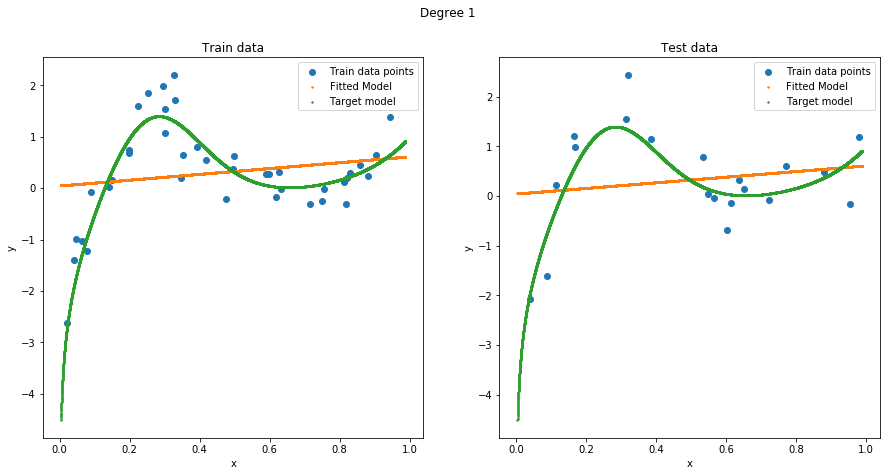

Coefficients for n = 1

╒═══════════╤══════════╕
│         1 │      x^1 │
╞═══════════╪══════════╡
│ 0.0496817 │ 0.567401 │
╘═══════════╧══════════╛

The mean squared error for the test data is 0.9972685483441092


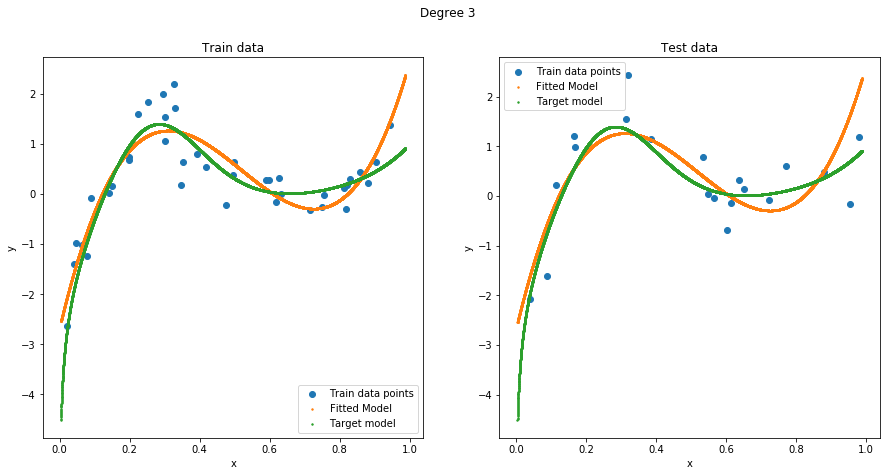

Coefficients for n = 3

╒══════════╤═════════╤══════════╤═════════╕
│        1 │     x^1 │      x^2 │     x^3 │
╞══════════╪═════════╪══════════╪═════════╡
│ -2.65599 │ 29.4946 │ -67.8658 │ 43.6979 │
╘══════════╧═════════╧══════════╧═════════╛

The mean squared error for the test data is 0.4756705766944319


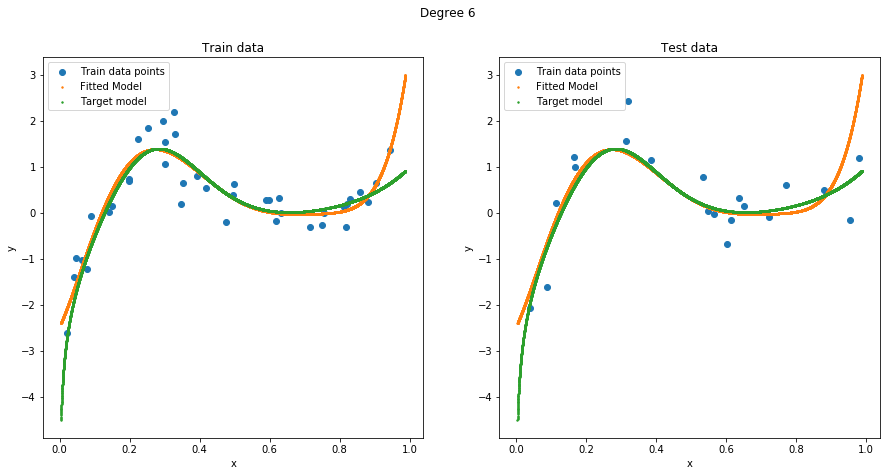

Coefficients for n = 6

╒══════════╤═════════╤═════════╤══════════╤═════════╤══════════╤═════════╕
│        1 │     x^1 │     x^2 │      x^3 │     x^4 │      x^5 │     x^6 │
╞══════════╪═════════╪═════════╪══════════╪═════════╪══════════╪═════════╡
│ -2.46879 │ 16.8974 │ 99.2154 │ -742.386 │ 1630.25 │ -1534.87 │ 537.012 │
╘══════════╧═════════╧═════════╧══════════╧═════════╧══════════╧═════════╛

The mean squared error for the test data is 0.4819859088971074


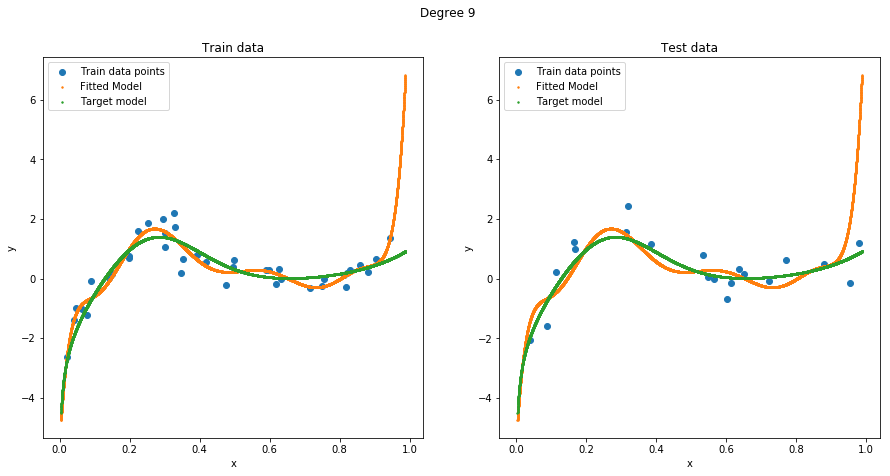

Coefficients for n = 9

╒══════════╤═════════╤═══════╤═════════╤═════════╤════════╤═════════╤════════╤═════════╤═════════╕
│        1 │     x^1 │   x^2 │     x^3 │     x^4 │    x^5 │     x^6 │    x^7 │     x^8 │     x^9 │
╞══════════╪═════════╪═══════╪═════════╪═════════╪════════╪═════════╪════════╪═════════╪═════════╡
│ -5.47181 │ 195.354 │ -3290 │ 28673.1 │ -136077 │ 375264 │ -619954 │ 605188 │ -321956 │ 71970.8 │
╘══════════╧═════════╧═══════╧═════════╧═════════╧════════╧═════════╧════════╧═════════╧═════════╛

The mean squared error for the test data is 1.2593162815840349


In [9]:
for n in {1,3,6,9}:
    
    # Creating polynomial features from degree 1 to n, for example x, x^2, x^3,..x^n for the training set
    x1 = x_train[:40].copy()# Taking the first ten elements since we are supposed to take 10 elements for training
    for i in range(1,n+1):
        x1[str(i)] = x1[0]**i 
    x1[0]=1

    
    # Creating polynomial features from degree 1 to n, for example x, x^2, x^3,..x^n for the test set
    x1_test = x_test.copy()
    for i in range(1,n+1):
        x1_test[str(i)] = x1_test[0]**i
    x1_test[0] = 1
    
    # Creating data for plotting the created model
    x_plot = pd.DataFrame(np.linspace(min(x),max(x),10000))
    x_plot1 = x_plot.copy()
    for i in range(1,n+1):
        x_plot1[str(i)] = x_plot[0]**i
    x_plot1[0] = 1
    
    y1 = y_train[:40].copy()  # Taking the first 10 elements of the target
    
    B = linear_regression(x1,y1) # Getting the linear regression parameters using the written function
    y1_pred = np.matrix(x1)*np.matrix(B) # Predicting target values using the fitted model
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Degree {}'.format(n))
    fig.set_figheight(7)
    fig.set_figwidth(15)
    # Plotting the train data

    ax1.scatter(x_train[:40],y1)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.scatter(x_plot,pd.DataFrame(np.matrix(x_plot1)*np.matrix(B)),s=2)
    ax1.scatter(x_plot, np.exp(np.sin(2*np.pi*x_plot)) + np.log(x_plot),s=2)
    ax1.set_title('Train data')
    ax1.legend(['Train data points','Fitted Model','Target model'])
    
    # Plotting the test data
    y1_test_pred = np.matrix(x1_test)*np.matrix(B)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.scatter(x_test,y_test)
    ax2.scatter(x_plot,pd.DataFrame(np.matrix(x_plot1)*np.matrix(B)),s=2)
    ax2.scatter(x_plot, np.exp(np.sin(2*np.pi*x_plot)) + np.log(x_plot),s=2)
    ax2.legend(['Train data points','Fitted Model','Target model'])
    ax2.set_title('Test data')
    
    plt.show()
    
    print('Coefficients for n = {}\n'.format(i))
    header = ['1']
    for i in range(1,n+1):
        header.append('x^{}'.format(i))
    print(tabulate(np.array(B.T),headers=header, tablefmt='fancy_grid'))
    

    
    # For identifying best model, we print the accuracy score
    print('\nThe mean squared error for the test data is {}'.format(mean_squared_error1(y1_test_pred,y_test)))

#### Performing polynomial regression for n = 1,3,6,9 taking all data points

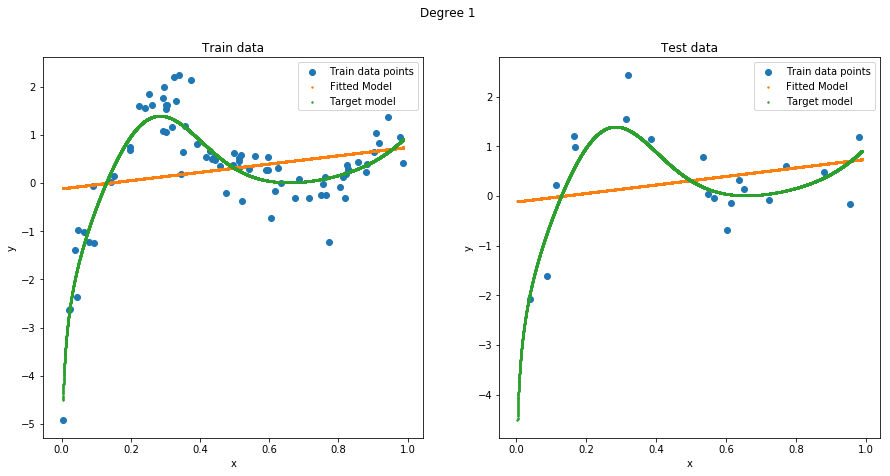

Coefficients for n = 1

╒═══════════╤══════════╕
│         1 │      x^1 │
╞═══════════╪══════════╡
│ -0.110518 │ 0.859736 │
╘═══════════╧══════════╛

The mean squared error for the test data is 1.0083059228857398


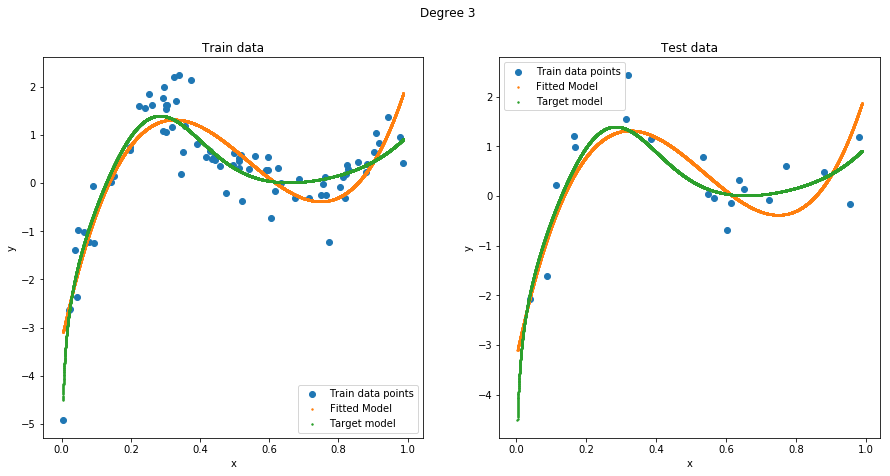

Coefficients for n = 3

╒══════════╤════════╤══════════╤═════════╕
│        1 │    x^1 │      x^2 │     x^3 │
╞══════════╪════════╪══════════╪═════════╡
│ -3.22598 │ 32.719 │ -72.2071 │ 44.8581 │
╘══════════╧════════╧══════════╧═════════╛

The mean squared error for the test data is 0.3761920736173785


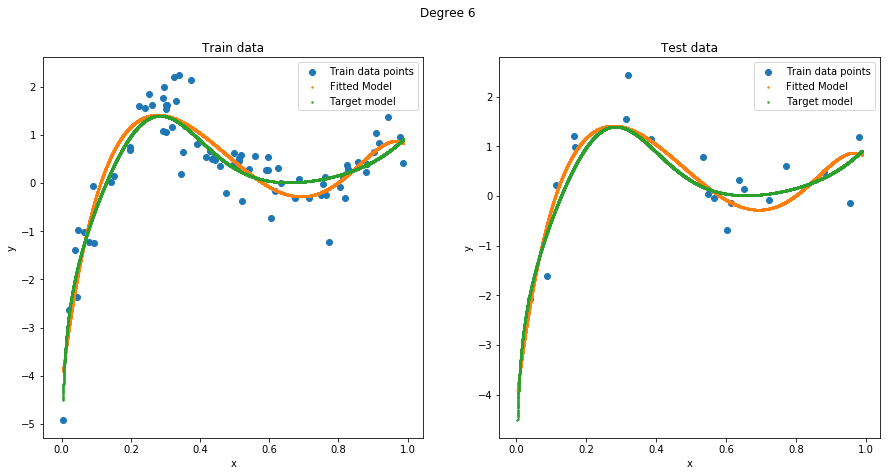

Coefficients for n = 6

╒═════════╤═════════╤══════════╤═════════╤══════════╤═════════╤══════════╕
│       1 │     x^1 │      x^2 │     x^3 │      x^4 │     x^5 │      x^6 │
╞═════════╪═════════╪══════════╪═════════╪══════════╪═════════╪══════════╡
│ -4.1254 │ 56.9604 │ -225.664 │ 478.748 │ -661.934 │ 541.388 │ -184.603 │
╘═════════╧═════════╧══════════╧═════════╧══════════╧═════════╧══════════╛

The mean squared error for the test data is 0.2619770057101163


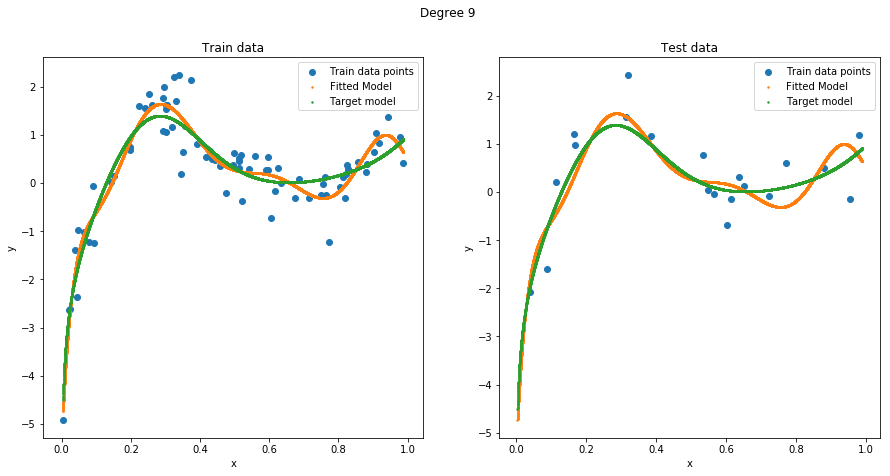

Coefficients for n = 9

╒══════════╤═════════╤══════════╤═════════╤════════╤════════╤═════════╤════════╤═════════╤═════════╕
│        1 │     x^1 │      x^2 │     x^3 │    x^4 │    x^5 │     x^6 │    x^7 │     x^8 │     x^9 │
╞══════════╪═════════╪══════════╪═════════╪════════╪════════╪═════════╪════════╪═════════╪═════════╡
│ -5.32163 │ 156.282 │ -2303.57 │ 18557.4 │ -82485 │ 213415 │ -330521 │ 301978 │ -150035 │ 31244.3 │
╘══════════╧═════════╧══════════╧═════════╧════════╧════════╧═════════╧════════╧═════════╧═════════╛

The mean squared error for the test data is 0.3381086551313305


In [10]:
table = []
for n in {1,3,6,9}:
    
    # Creating polynomial features from degree 1 to n, for example x, x^2, x^3,..x^n for the training set
    x1 = x_train.copy()# Taking the first ten elements since we are supposed to take 10 elements for training
    for i in range(1,n+1):
        x1[str(i)] = x1[0]**i 
    x1[0]=1

    
    # Creating polynomial features from degree 1 to n, for example x, x^2, x^3,..x^n for the test set
    x1_test = x_test.copy()
    for i in range(1,n+1):
        x1_test[str(i)] = x1_test[0]**i
    x1_test[0] = 1
    
    # Creating data for plotting the created model
    x_plot = pd.DataFrame(np.linspace(min(x),max(x),10000))
    x_plot1 = x_plot.copy()
    for i in range(1,n+1):
        x_plot1[str(i)] = x_plot[0]**i
    x_plot1[0] = 1
    
    y1 = y_train.copy()  # Taking the first 10 elements of the target
    
    B = linear_regression(x1,y1)  # Getting the linear regression parameters using the written function
    y1_pred = np.matrix(x1)*np.matrix(B)  # Predicting target values using the fitted model
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Degree {}'.format(n))
    fig.set_figheight(7)
    fig.set_figwidth(15)
    # Plotting the train data

    ax1.scatter(x_train,y1)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.scatter(x_plot,pd.DataFrame(np.matrix(x_plot1)*np.matrix(B)),s=2)
    ax1.scatter(x_plot, np.exp(np.sin(2*np.pi*x_plot)) + np.log(x_plot),s=2)
    ax1.set_title('Train data')
    ax1.legend(['Train data points','Fitted Model','Target model'])
#     ax1.show()
    
    # Plotting the test data
    y1_test_pred = np.matrix(x1_test)*np.matrix(B)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.scatter(x_test,y_test)
    ax2.scatter(x_plot,pd.DataFrame(np.matrix(x_plot1)*np.matrix(B)),s=2)
    ax2.scatter(x_plot, np.exp(np.sin(2*np.pi*x_plot)) + np.log(x_plot),s=2)
    ax2.legend(['Train data points','Fitted Model','Target model'])
    ax2.set_title('Test data')
    
    
    plt.show()
    
    print('Coefficients for n = {}\n'.format(i))
    header = ['1']
    for i in range(1,n+1):
        header.append('x^{}'.format(i))
    print(tabulate(np.array(B.T),headers=header, tablefmt='fancy_grid'))
    
    # For identifying best model, we print the accuracy score
    print('\nThe mean squared error for the test data is {}'.format(mean_squared_error1(y1_test_pred,y_test)))

We can see that for all cases, as n increases, the variance goes up leading to a lot of error for the test dataset. And as n is very small, there is a lot of bias still leading to high error for test dataset.

When the size of the training dataset is very small (say n=10), the model with n = 3 works the best due to this bias variance tradeoff.
When  n increases the models n = 6 and n = 9 start working better due to more datapoints leading to more accurate models, but still due to the high variance of n = 9 model as it tries to fit through every single spoint including noises, n = 6 works the best when the entire dataset is taken 

#### Identifying best model and plotting target vs predictions for the best model

From the MSE, we can see that model with n = 6 performs the best when the entire train data is taken


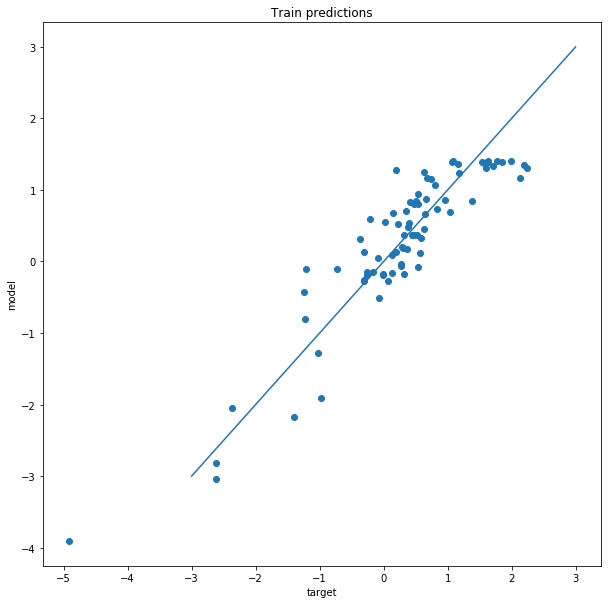

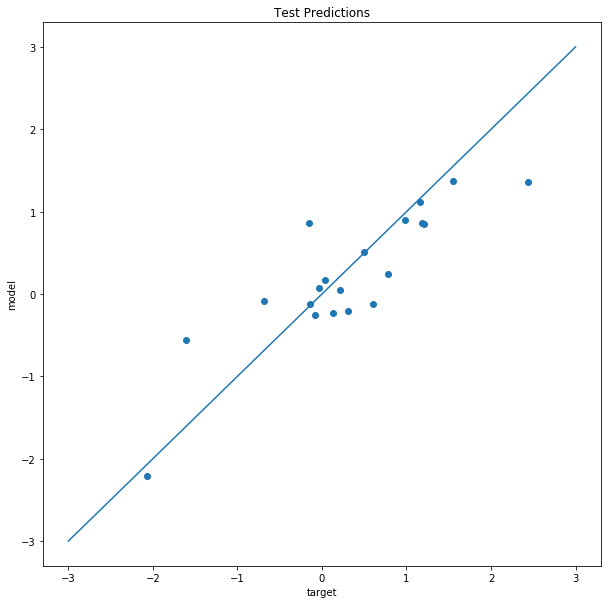

In [11]:
print('From the MSE, we can see that model with n = 6 performs the best when the entire train data is taken')

# Creating a matrix x3 with the polynomial features upto degree 3
x3 = x_train.copy() 
for i in range(1,7):
    x3[str(i)] = x3[0]**i
x3[0]=1

# Duplicating y3 for the purpose of this question
y3 = y_train.copy()

# Performing linear regression and predicting the train values
B = linear_regression(x3,y3) # Getting the linear regression parameters using the written function
y3_train_pred = pd.DataFrame(np.matrix(x3)*np.matrix(B))  # Predicting target values using the fitted model

# Converting x3 into the required polynomial format and predicting the y_test values
x3_test = x_test.copy()
for i in range(1,7):
    x3_test[str(i)] = x3_test[0]**i
x3_test[0]=1

y3_test = y_test.copy()
y3_test_pred = pd.DataFrame(np.matrix(x3_test)*np.matrix(B))

# Creating a numpy array x_plot for the purpose of plotting 45 degree line
x_plot = np.linspace(-3,3,200)

#Train plot
plt.figure(figsize=[10,10])
plt.scatter(y_train,y3_train_pred)
plt.plot(x_plot,x_plot)
plt.xlabel('target')
plt.ylabel('model')
plt.title('Train predictions')
plt.show()

#Test plot
plt.figure(figsize=[10,10])
plt.scatter(y_test,y3_test_pred)
plt.plot(x_plot,x_plot)
plt.xlabel('target')
plt.ylabel('model')
plt.title('Test Predictions')
plt.show()

#### RMS error for the train and test dataset

In [12]:
# We will calculate the RMS errors for train and test dataset for n = 1,3,6,9
n_set = [1,3,6,9]
rms_train_set = []
rms_test_set = []

for n in n_set:
    x3 = x_train.copy() 
    for i in range(1,n+1):
        x3[str(i)] = x3[0]**i
    x3[0]=1

    # Duplicating y3 for the purpose of this question
    y3 = y_train.copy()
    # Performing linear regression and predicting the train values
    B = linear_regression(x3,y3)
    y3_train_pred = pd.DataFrame(np.matrix(x3)*np.matrix(B))
    
    #Calculating rms_train
    rms_train = 0
    for i in range(len(y_train)):
        rms_train = rms_train + (y_train[0][i]-y3_train_pred[0][i])**2
    rms_train = (rms_train/len(y_train))**0.5
    rms_train_set.append(rms_train)
    
    
    # Converting x3 into the required polynomial format and predicting the y_test values
    x3_test = x_test.copy()
    for i in range(1,n+1):
        x3_test[str(i)] = x3_test[0]**i
    x3_test[0]=1
    y3_test = y_test.copy()
    y3_test_pred = pd.DataFrame(np.matrix(x3_test)*np.matrix(B))

    # Calculating rms_test
    rms_test = 0
    for i in range(len(y_test)):
        rms_test = rms_test + (y_test[0][i]-y3_test_pred[0][i])**2
    rms_test = (rms_test/len(y_test))**0.5
    rms_test_set.append(rms_test)
    
    # Creating a numpy array x_plot for the purpose of plotting 45 degree line
    x_plot = np.linspace(-3,3,200)

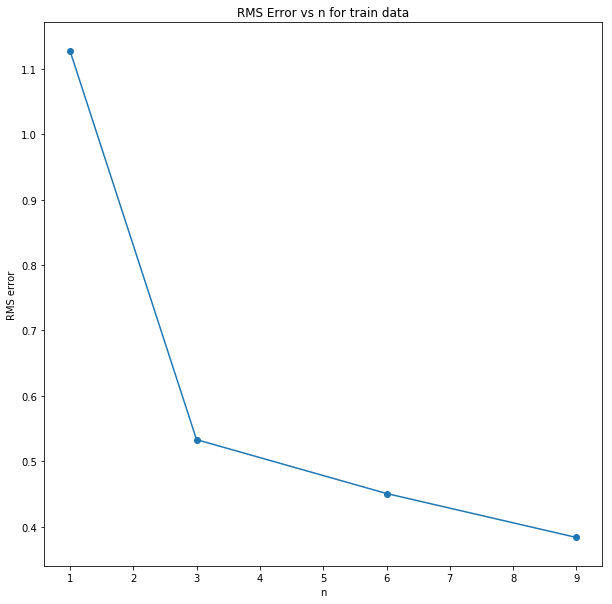

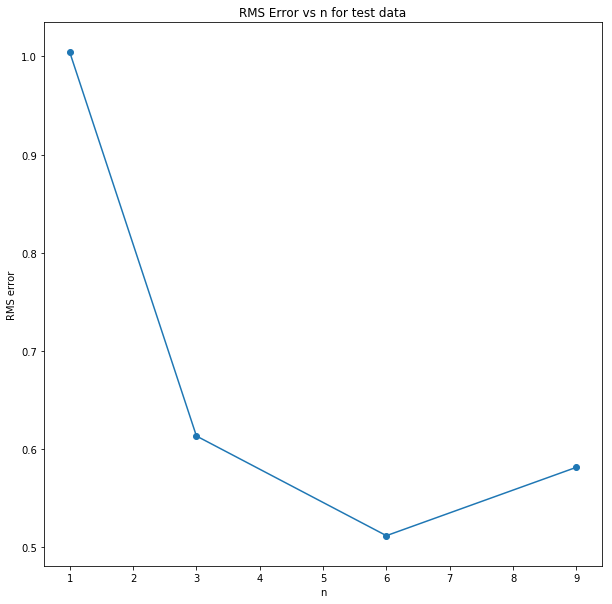

Here we see that we get the least RMS error for n = 6 and not n = 3 as we have included all 
the data in the train set rather than 10 data points we did in part 2. Hence, if we use all data points in the
train dataset, n = 6 gives the best fit


In [13]:
# Plotting RMS for train data
plt.figure(figsize=[10,10])
plt.title('RMS Error vs n for train data')
plt.xlabel('n')
plt.ylabel('RMS error')
plt.scatter(n_set,rms_train_set)
plt.plot(n_set,rms_train_set)
plt.show()

# Plotting RMS for test data
plt.figure(figsize=[10,10])
plt.title('RMS Error vs n for test data')
plt.xlabel('n')
plt.ylabel('RMS error')
plt.scatter(n_set,rms_test_set)
plt.plot(n_set,rms_test_set)
plt.show()

print('''Here we see that we get the least RMS error for n = 6 and not n = 3 as we have included all 
the data in the train set rather than 10 data points we did in part 2. Hence, if we use all data points in the
train dataset, n = 6 gives the best fit''')